# 绘制分形

分形是一种重复应用简单的几何变换得到的复杂的几何图形，即整个图形由无数个自身副本构成。  
由于分形设计平面上点的相同几何变换的重复应用，因此非常适合用计算机程序来创建。

In [1]:
import matplotlib.pyplot as plt
import random

## 平面上点的变换

创建分形的基本思想是点的变换。

In [2]:
def transformation_1(p):
    x, y = p[0], p[1]
    return (x+1, y-1)

def transformation_2(p):
    x, y = p[0], p[1]
    return (x+1, y+1)

def transform(p):
    transformations = [transformation_1, transformation_2]
    t = random.choice(transformations)
    x, y = t(p)
    return x, y

def build_trajectory(p, n):
    x, y = [p[0]], [p[1]]
    for i in range(n):
        p = transform(p)
        x.append(p[0])
        y.append(p[1])
    return x, y

Enter the number of interations:  100


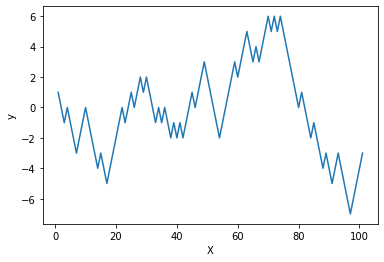

In [3]:
if __name__ == '__main__':
    p = (1, 1)
    n = int(input('Enter the number of interations: '))
    x, y = build_trajectory(p, n)
    plt.plot(x, y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

Enter the number of interations:  1000


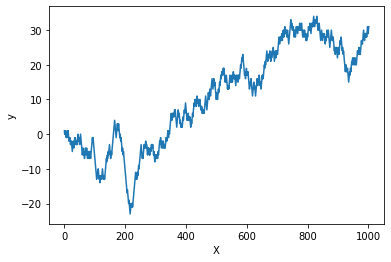

In [4]:
if __name__ == '__main__':
    p = (1, 1)
    n = int(input('Enter the number of interations: '))
    x, y = build_trajectory(p, n)
    plt.plot(x, y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

## 绘制 Barnsley 蕨类植物

英国数学家 Michael Barnsley 描述了如何对一个点进行重复的简单变换，从而创造类似蕨类植物的结构。  
他提出了以下步骤来创建蕨类植物的结构：以 `(0, 0)` 为初始点，按事先分配的概率随机选择乳腺的变换规则。

- 变换1（概率为0.85）：
    - x<sub>n+1</sub> = 0.85x<sub>n</sub> + 0.04y<sub>n</sub>
    - y<sub>n+1</sub> = -0.04x<sub>n</sub> + 0.85y<sub>n</sub> + 1.6
- 变换2（概率为0.07）：
    - x<sub>n+1</sub> = 0.20x<sub>n</sub> - 0.26y<sub>n</sub>
    - y<sub>n+1</sub> = 0.23x<sub>n</sub> + 0.22y<sub>n</sub> + 1.6
- 变换3（概率为0.07）：
    - x<sub>n+1</sub> = -0.15x<sub>n</sub> + 0.28y<sub>n</sub>
    - y<sub>n+1</sub> = 0.26x<sub>n</sub> + 0.24y<sub>n</sub> + 0.44
- 变换4（概率为0.01）：
    - x<sub>n+1</sub> = 0
    - y<sub>n+1</sub> = 0.16y<sub>n</sub>
    
上述每一个变换对应于蕨类植物的一部分。第一个变换被选中的概率最大，因此被执行的次数最多，从而产生了蕨类植物的茎和底部的叶子。第二个和第三个变换分别对应左边和右边底部的叶子，第四个变换绘制了蕨类植物的茎。

In [5]:
def transformation_1(p):
    x, y = p[0], p[1]
    x1 = 0.85*x + 0.04*y
    y1 = -0.04*x + 0.85*y + 1.6
    return x1, y1

def transformation_2(p):
    x, y = p[0], p[1]
    x1 = 0.20*x - 0.26*y
    y1 = 0.23*x + 0.22*y + 1.6
    return x1, y1

def transformation_3(p):
    x, y = p[0], p[1]
    x1 = -0.15*x + 0.28*y
    y1 = 0.26*x + 0.24*y + 0.44
    return x1, y1

def transformation_4(p):
    x, y = p[0], p[1]
    x1 = 0
    y1 = 0.16*y
    return x1, y1

def get_index(probability):
    r = random.random()
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    for item, sp in enumerate(sum_probability):
        if r <= sp:
            return item
    return len(probability)-1

def transform(p):
    transformations = [transformation_1, transformation_2, transformation_3, transformation_4]
    probability = [0.85, 0.07, 0.07, 0.01]
    tindex = get_index(probability)
    t = transformations[tindex]
    x, y = t(p)
    return x, y

def draw_fern(n):
    x, y = [0], [0]
    x1, y1 = 0, 0
    for i in range(n):
        x1, y1 = transform((x1, y1))
        x.append(x1)
        y.append(y1)
    return x, y

Enter the number of points in the Fern:  1000


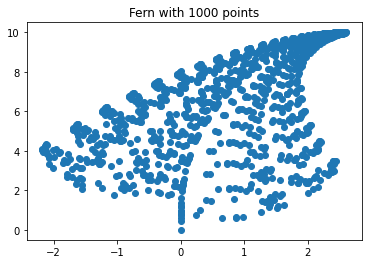

In [6]:
if __name__ == '__main__':
    n = int(input('Enter the number of points in the Fern: '))
    x, y = draw_fern(n)
    plt.plot(x, y, 'o')
    plt.title('Fern with {0} points'.format(n))
    plt.show()

Enter the number of points in the Fern:  10000


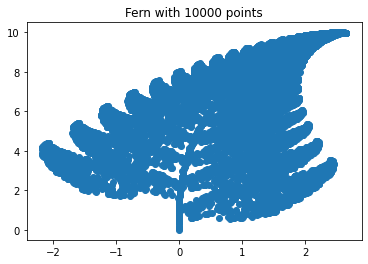

In [7]:
if __name__ == '__main__':
    n = int(input('Enter the number of points in the Fern: '))
    x, y = draw_fern(n)
    plt.plot(x, y, 'o')
    plt.title('Fern with {0} points'.format(n))
    plt.show()